# **Kernel Trick SVM**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.axes._axes import _log as matplotlib_axes_logger 
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

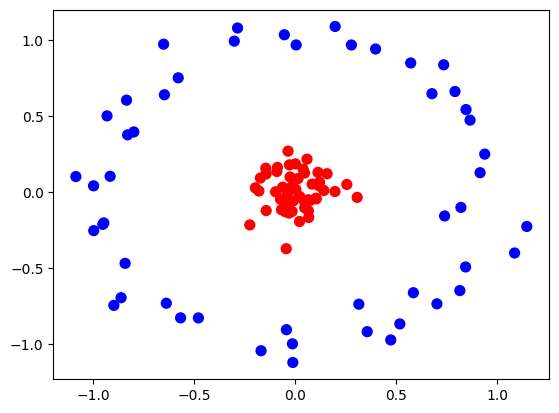

In [3]:
from sklearn.datasets._samples_generator import make_circles

X,y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.65

In [25]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() -1, 
                                   stop=X_set[:, 0].max() +1,
                                   step = 0.01),
                                   np.arange(start=X_set[:,1].min() -1,
                                             stop=X_set[:,1].max() +1,
                                             step=0.01))
                                            
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(),
                                              X2.ravel()]).T).reshape(X1.shape),
                                              alpha=0.75,
                                              cmap=zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = (zero_one_colourmap)(i), label=j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\asada\AppData\Local\Temp\ipykernel_3792\3196221761.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


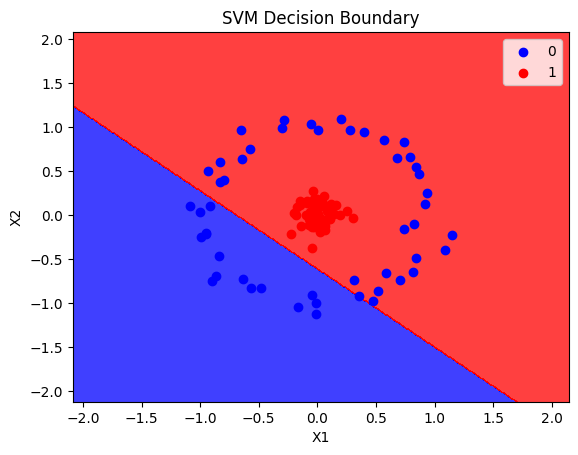

In [26]:
plot_decision_boundary(X,y,classifier)

In [27]:
def plot_3d_plot(X,y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:,1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

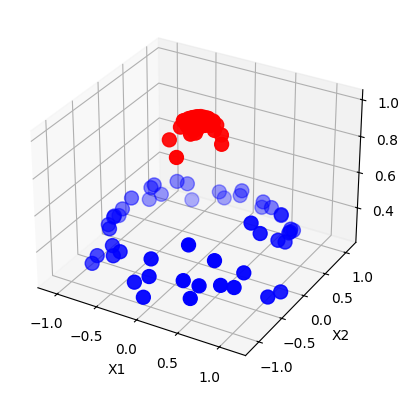

In [28]:
plot_3d_plot(X,y)

In [29]:
rbf_classifier = SVC(kernel='rbf')
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [30]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\asada\AppData\Local\Temp\ipykernel_3792\3196221761.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


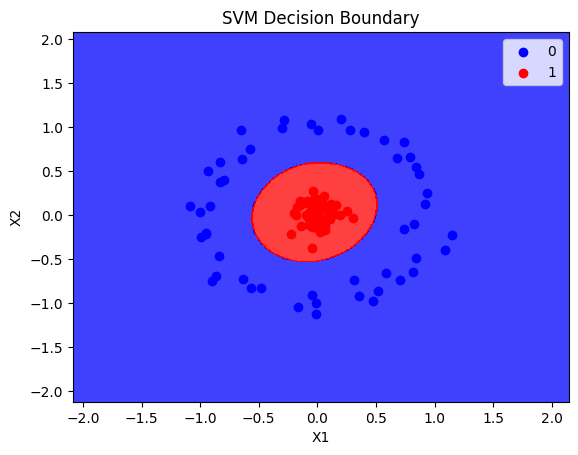

In [31]:
plot_decision_boundary(X,y,rbf_classifier)

In [44]:
poly_classifier = SVC(kernel='poly', degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [45]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\asada\AppData\Local\Temp\ipykernel_3792\3196221761.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


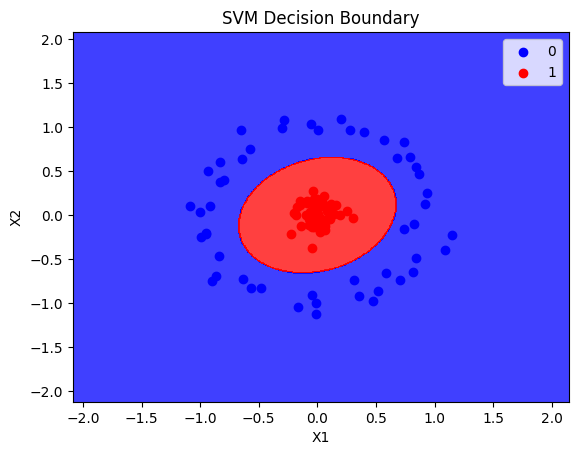

In [46]:
plot_decision_boundary(X,y, poly_classifier)

In [47]:
X

array([[-3.01686600e-01,  9.91397629e-01],
       [ 3.97430855e-01,  9.39632048e-01],
       [ 7.38772093e-01, -1.57925006e-01],
       [ 7.90168444e-01,  6.60230147e-01],
       [-8.29250778e-01,  3.75298689e-01],
       [-1.45897676e-01,  1.55738580e-01],
       [-8.61701340e-01, -6.95345107e-01],
       [ 1.18738629e-01,  3.97698248e-02],
       [-9.97715319e-01,  4.01979901e-02],
       [-8.97288823e-01, -7.45512324e-01],
       [ 4.32393215e-03,  9.66198633e-01],
       [-2.71096627e-02, -7.45679484e-02],
       [ 6.37723101e-02, -5.16623263e-02],
       [ 6.50514451e-02, -1.24100782e-01],
       [ 2.66238918e-03,  1.72015734e-02],
       [ 7.34392612e-01,  8.35557539e-01],
       [-1.79736169e-01,  6.24481599e-03],
       [ 1.97351620e-01,  1.08760707e+00],
       [-2.87031640e-02,  1.78037771e-01],
       [ 1.57584282e-01,  1.19830236e-01],
       [ 1.20126849e-01,  6.37824752e-02],
       [-1.08514166e+00,  1.01115589e-01],
       [ 1.08493304e+00, -4.01270141e-01],
       [-7.

In [48]:
np.exp(-(X**2)).sum(1)

array([1.28723997, 1.26746969, 1.55475538, 1.1822807 , 1.37137308,
       1.95497609, 1.09252719, 1.98441967, 1.36794776, 1.02065076,
       1.39314084, 1.99372039, 1.99327591, 1.98049424, 1.99969706,
       1.08063901, 1.96817215, 1.26819329, 1.96797612, 1.96121631,
       1.98161322, 1.29786563, 1.15945438, 1.38461155, 1.96785539,
       1.48591041, 1.35949104, 1.97983928, 1.98974465, 1.99205043,
       1.90475732, 1.41756523, 1.34091197, 1.9623224 , 1.23622593,
       1.29851479, 1.1940698 , 1.98722834, 1.98350795, 1.99864982,
       1.28482541, 1.31109204, 1.30803794, 1.99646985, 1.29197258,
       1.90916729, 1.99057363, 1.9904221 , 1.96213802, 1.96652322,
       1.9646474 , 1.19919914, 1.43857262, 1.20893741, 1.30750151,
       1.99238291, 1.25127684, 1.9807876 , 1.98254766, 1.50045718,
       1.28445306, 1.35550102, 1.21909858, 1.93456528, 1.19307281,
       1.96653018, 1.9951511 , 1.9913581 , 1.1880698 , 1.97636927,
       1.17233615, 1.96242677, 1.97386003, 1.35546378, 1.99850

In [49]:
X_new=np.exp(-(X**2))

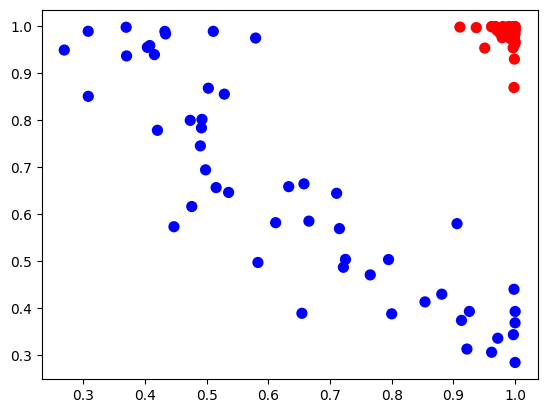

In [51]:
plt.scatter(X_new[:,0], X_new[:,1], c=y, s=50, cmap='bwr')